In [ ]:
import yfinance as yf
import os
import pandas as pd

In [ ]:
btc_ticker = yf.Ticker("BTC-USD")

In [ ]:
df = btc_ticker.history(period = 'max')

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-24 00:00:00+00:00,66408.718750,67075.367188,63589.871094,64276.898438,30276655120,0.0,0.0
2024-04-25 00:00:00+00:00,64275.019531,65275.207031,62783.632812,64481.707031,32155786816,0.0,0.0
2024-04-26 00:00:00+00:00,64485.371094,64789.656250,63322.398438,63755.320312,24139372950,0.0,0.0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-24 00:00:00+00:00,66408.718750,67075.367188,63589.871094,64276.898438,30276655120,0.0,0.0
2024-04-25 00:00:00+00:00,64275.019531,65275.207031,62783.632812,64481.707031,32155786816,0.0,0.0
2024-04-26 00:00:00+00:00,64485.371094,64789.656250,63322.398438,63755.320312,24139372950,0.0,0.0


In [ ]:
df = df.reset_index()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          3512 non-null   datetime64[ns, UTC]
 1   Open          3512 non-null   float64            
 2   High          3512 non-null   float64            
 3   Low           3512 non-null   float64            
 4   Close         3512 non-null   float64            
 5   Volume        3512 non-null   int64              
 6   Dividends     3512 non-null   float64            
 7   Stock Splits  3512 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 219.6 KB


In [ ]:
data = df['Close'].values

In [ ]:
data.shape

(3512,)

In [ ]:
train_size = int(len(data)*0.75)
train_data = data[:train_size]
test_data  =  data[train_size:]

In [ ]:
train_data.shape,test_data.shape

((2634,), (878,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [ ]:
train_data = scalar.fit_transform(train_data.reshape(-1,1))
test_data = scalar.transform(test_data.reshape(-1,1))

In [ ]:
train_data.shape,test_data.shape

((2634, 1), (878, 1))

In [ ]:
train_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.84327642],
       [0.84660639],
       [0.83544708]])

In [ ]:
import numpy as np
def generate_dataset(dataset,timestamps):
  x =[]
  y = []
  for i in range(len(dataset)-2*timestamps-1):
    x.append(dataset[i:i+timestamps].flatten())
    y.append(dataset[timestamps+i:i+2*timestamps].flatten())
  return np.array(x),np.array(y)

In [ ]:
x_train,y_train = generate_dataset(train_data,60)
x_test,y_test = generate_dataset(test_data,60)

In [ ]:
x_train.shape,y_train.shape

((2513, 60), (2513, 60))

In [ ]:
x_test.shape,y_test.shape

((757, 60), (757, 60))

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
from tensorflow import keras
from keras import regularizers
from keras.layers import Dense,LSTM,Dropout
model = keras.Sequential()
model.add(LSTM(50,activation='tanh',input_shape = (60,1),kernel_regularizer= regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(60))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics='mae')

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_mae',patience=20,restore_best_weights=True)

In [ ]:
history= model.fit(x_train,y_train,epochs=100,batch_size=64,validation_data=(x_test,y_test),callbacks=[early_stopping])
model.save('bitcoin_price_predict.keras')

Epoch 1/100
40/40 [==============================] - 4s 51ms/step - loss: 0.0606 - mae: 0.1135 - val_loss: 0.0385 - val_mae: 0.1163
Epoch 2/100
40/40 [==============================] - 1s 31ms/step - loss: 0.0186 - mae: 0.0515 - val_loss: 0.0300 - val_mae: 0.1249
Epoch 3/100
40/40 [==============================] - 1s 32ms/step - loss: 0.0119 - mae: 0.0446 - val_loss: 0.0234 - val_mae: 0.1137
Epoch 4/100
40/40 [==============================] - 1s 35ms/step - loss: 0.0091 - mae: 0.0442 - val_loss: 0.0499 - val_mae: 0.1998
Epoch 5/100
40/40 [==============================] - 2s 51ms/step - loss: 0.0074 - mae: 0.0429 - val_loss: 0.0376 - val_mae: 0.1696
Epoch 6/100
40/40 [==============================] - 1s 32ms/step - loss: 0.0065 - mae: 0.0426 - val_loss: 0.0308 - val_mae: 0.1487
Epoch 7/100
40/40 [==============================] - 1s 31ms/step - loss: 0.0056 - mae: 0.0392 - val_loss: 0.0406 - val_mae: 0.1761
Epoch 8/100
40/40 [==============================] - 1s 32ms/step - loss: 0.

KeyboardInterrupt: 

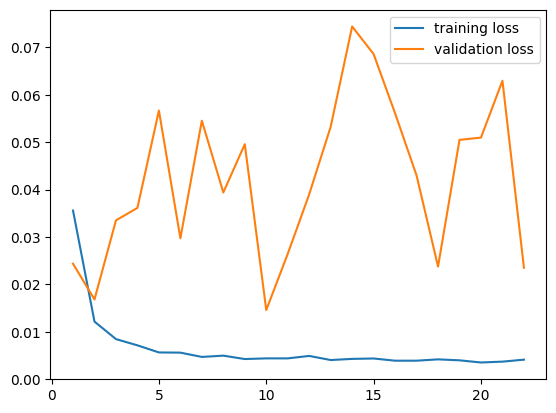

In [ ]:
history_dict  = history.history
history_dict['loss']
epochs = range(1,len(history_dict['val_loss'])+1)
from matplotlib import pyplot as plt
plt.plot(epochs,history_dict['loss'],label='training loss')
plt.plot(epochs,history_dict['val_loss'],label='validation loss')
plt.legend()

In [ ]:
from keras.models import load_model
model  = load_model('bitcoin_price_predict.keras')

In [ ]:
model.evaluate(x_test,y_test)

24/24 [==============================] - 2s 29ms/step - loss: 0.0168 - mae: 0.0861


[0.01682296022772789, 0.08612052351236343]

In [ ]:
train_predict= scalar.inverse_transform(model.predict(x_train))

79/79 [==============================] - 4s 56ms/step


In [ ]:
train_predict[:,-1].shape

(2513,)

In [ ]:
train_date = df['Date'].iloc[60:len(train_predict)+60]
train_date

60     2014-11-16 00:00:00+00:00
61     2014-11-17 00:00:00+00:00
62     2014-11-18 00:00:00+00:00
63     2014-11-19 00:00:00+00:00
64     2014-11-20 00:00:00+00:00
                  ...           
2568   2021-09-28 00:00:00+00:00
2569   2021-09-29 00:00:00+00:00
2570   2021-09-30 00:00:00+00:00
2571   2021-10-01 00:00:00+00:00
2572   2021-10-02 00:00:00+00:00
Name: Date, Length: 2513, dtype: datetime64[ns, UTC]

In [ ]:
test_date = df['Date'].iloc[len(train_data)+2*60+1:]
test_date

2755   2022-04-03 00:00:00+00:00
2756   2022-04-04 00:00:00+00:00
2757   2022-04-05 00:00:00+00:00
2758   2022-04-06 00:00:00+00:00
2759   2022-04-07 00:00:00+00:00
                  ...           
3507   2024-04-24 00:00:00+00:00
3508   2024-04-25 00:00:00+00:00
3509   2024-04-26 00:00:00+00:00
3510   2024-04-27 00:00:00+00:00
3511   2024-04-28 00:00:00+00:00
Name: Date, Length: 757, dtype: datetime64[ns, UTC]

In [ ]:
test_date = df['Date'].iloc[len(train_predict) + 2*60 +60 : len(train_predict) + 2*60 + 60 + len(test_predict)]

In [ ]:
test_predict = scalar.inverse_transform(model.predict(x_test))

24/24 [==============================] - 1s 26ms/step


In [ ]:
test_predict[:,-1].shape

(757,)

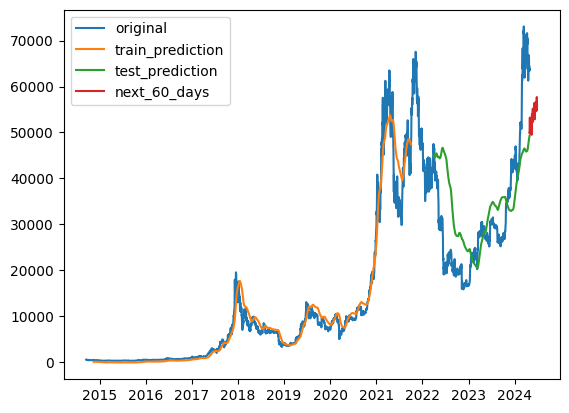

In [ ]:
from matplotlib import pyplot as plt
plt.plot(df['Date'],data,label = 'original')
plt.plot(train_date,train_predict[:,-1],label='train_prediction')
plt.plot(test_date,test_predict[:,-1],label = 'test_prediction')
plt.plot(future_date,future_price,label = 'next_60_days')
plt.legend()

In [ ]:
 # prediction_for next 60 days
last_data = test_data[-60:].reshape(1,60,1)
future_price = scalar.inverse_transform(model.predict(last_data)).flatten()

1/1 [==============================] - 0s 39ms/step


In [ ]:
future_price

array([49979.176, 49749.156, 53215.445, 50298.824, 51940.17 , 51371.312,
       51134.875, 53038.336, 52996.656, 51844.207, 52624.766, 51750.406,
       52210.004, 52304.79 , 52850.938, 51914.793, 49469.637, 52188.97 ,
       53810.03 , 53500.336, 54017.52 , 53460.97 , 54046.598, 52189.414,
       54461.92 , 55158.363, 54947.49 , 53745.54 , 53442.074, 54355.29 ,
       55151.63 , 52905.082, 54154.883, 53356.824, 54301.027, 54960.023,
       56357.61 , 55857.152, 55080.594, 55393.848, 52838.19 , 54007.258,
       55502.316, 55683.12 , 54399.434, 54601.277, 55166.203, 55642.688,
       55116.95 , 56668.   , 55171.31 , 55684.285, 55187.414, 54815.047,
       54685.4  , 56241.695, 56313.73 , 57698.92 , 54848.453, 56013.43 ],
      dtype=float32)

In [ ]:
last_date = df['Date'].values[-1]

In [ ]:
future_date= pd.date_range(start=last_date,periods=60,freq='D')

In [ ]:
df['Date']

0      2014-09-17 00:00:00+00:00
1      2014-09-18 00:00:00+00:00
2      2014-09-19 00:00:00+00:00
3      2014-09-20 00:00:00+00:00
4      2014-09-21 00:00:00+00:00
                  ...           
3506   2024-04-23 00:00:00+00:00
3507   2024-04-24 00:00:00+00:00
3508   2024-04-25 00:00:00+00:00
3509   2024-04-26 00:00:00+00:00
3510   2024-04-27 00:00:00+00:00
Name: Date, Length: 3511, dtype: datetime64[ns, UTC]

In [ ]:
future_date

DatetimeIndex(['2024-04-27', '2024-04-28', '2024-04-29', '2024-04-30',
               '2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04',
               '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08',
               '2024-05-09', '2024-05-10', '2024-05-11', '2024-05-12',
               '2024-05-13', '2024-05-14', '2024-05-15', '2024-05-16',
               '2024-05-17', '2024-05-18', '2024-05-19', '2024-05-20',
               '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24',
               '2024-05-25', '2024-05-26', '2024-05-27', '2024-05-28',
               '2024-05-29', '2024-05-30', '2024-05-31', '2024-06-01',
               '2024-06-02', '2024-06-03', '2024-06-04', '2024-06-05',
               '2024-06-06', '2024-06-07', '2024-06-08', '2024-06-09',
               '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13',
               '2024-06-14', '2024-06-15', '2024-06-16', '2024-06-17',
               '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21',
      

# plotting the price of bitcoin for next 60 days

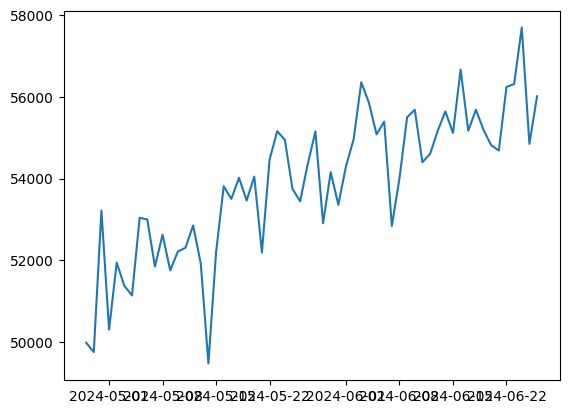

In [ ]:
plt.plot(future_date,future_price)